In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pyabf
import os
import pandas as pd


In [46]:
file = r"C:\Users\dongq\OneDrive\mouse patch-seq\Mecp2 project\3 weeks\2023_05_05_0001.abf"

In [36]:
df = pd.DataFrame({'File': ['2023_04_10_0003.abf', '2023_04_10_0004.abf', '2023_04_10_0005.abf']})

In [40]:
df

,File
0,2023_04_10_0003.abf
1,2023_04_10_0004.abf
2,2023_04_10_0005.abf


In [47]:
f = pyabf.ABF(file)


In [4]:
from feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor
sfe = SpikeFeatureExtractor(filter=2)
spte = SpikeTrainFeatureExtractor(start=0, end=16000)


In [48]:
for index in f.sweepList:
    f.setSweep(index)
    print(f.sweepEpochs.levels, f.sweepEpochs.types)

[0.0, 0.0, -100.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, -80.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, -60.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, -40.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, -20.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 0.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 20.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 40.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 60.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 80.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 100.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 120.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 140.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 160.0, 0.0] ['Step', 'Step', 'Step', 'Step']
[0.0, 0.0, 180.0, 0.0] ['Step', 'Step', 'Step', 'Step']


In [50]:
import subthresh_features as sbth

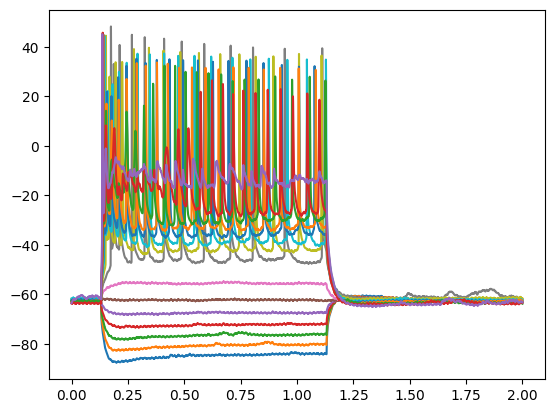

In [69]:

rmp = []
rin = []
tau = []
sag = []

sampling_rate = f.sampleRate
temp_result_list = []
flag_spike = False
for index in f.sweepList:
    f.setSweep(index)
    t = f.sweepX
    v = f.sweepY
    i = f.sweepC

    if f.sweepUnitsY == f.sweepUnitsC:
        v = v/20

    rmp.append(np.median(v[np.where(i == 0)]))
    tau.append(sbth.time_constant(t=t, v=v, i=i, start=1, end=1.8))
    sag.append(sbth.sag(t=t, v=v, i=i, start=0.2, end=1.0))
    
    ft = sfe.process(t, v, i)
    # ft.to_csv(f'{index}.csv', index=False)
    sptft= spte.process(t=t, v=v, i=i, spikes_df=ft)
    current = f.sweepEpochs.levels[1]
    sptft['current'] = current
    temp_result_list.append((ft, sptft))
    plt.plot(t, v)



    


## Todo:
1. start, end time
2. sag ratio
3. volatge clamp mode